In [103]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random


In [104]:
X,y=make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [105]:
df=pd.DataFrame(X,columns=["col1","col2","col3","col4","col5"])
df["target"]=y

In [106]:
df

,col1,col2,col3,col4,col5,target
0,0.557837,0.397599,0.965699,2.166946,-3.704155,0
1,1.394523,-2.550442,-4.422000,-0.486745,-0.720694,1
2,-1.613203,1.098142,0.762169,-2.187321,2.144816,1
3,1.480022,0.436693,-0.259981,-0.784443,0.109802,1
4,-2.958216,1.145848,0.683124,1.620441,1.660550,0
...,...,...,...,...,...,...
95,-1.909789,1.989116,1.514830,0.295037,-0.534569,0
96,-0.856545,1.193202,0.692450,1.870952,-1.046935,0
97,0.214027,0.453738,-2.482687,-1.669178,-0.300641,1
98,-2.029340,2.776097,1.452219,1.199433,-1.286991,0


In [107]:
df.shape

(100, 6)

In [108]:
# function for row sampling
def sample_row(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [109]:
# funtion for feature sampling
def sample_feature(df,percent):
    cols=random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df=df[cols]
    new_df["target"]=df["target"]
    return new_df

In [110]:
df.shape

(100, 6)

In [111]:
# function for combined sampling
def combined_sampling(df,row_percent,col_percent):
    new_df=sample_row(df,row_percent)
    return sample_feature(new_df,col_percent)

In [112]:
df1=sample_row(df,0.20)

In [113]:
df2=sample_row(df,0.20)

In [114]:
df3=sample_row(df,0.20)

In [115]:
df1.shape

(20, 6)

In [116]:
df2.shape

(20, 6)

In [117]:
df3.shape

(20, 6)

In [118]:
from sklearn.tree import DecisionTreeClassifier
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()

In [119]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [120]:
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'x[1] <= -0.151\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= -1.218\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]')]

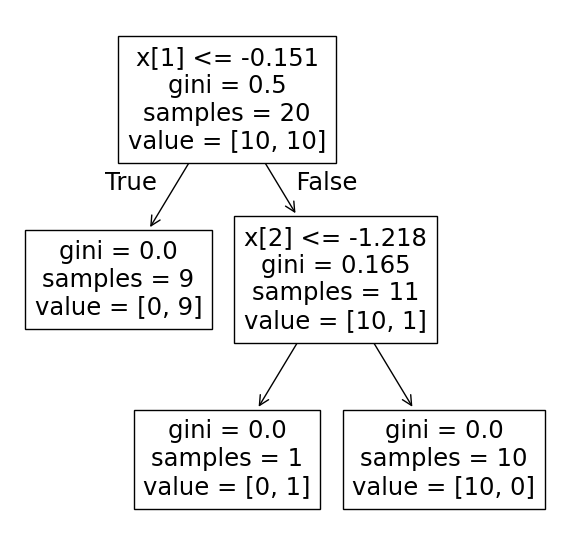

In [121]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plot_tree(clf1)

[Text(0.5, 0.8333333333333334, 'x[3] <= 0.833\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.25, 0.5, 'x[0] <= -1.546\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.75, 0.5, 'x[4] <= 1.497\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

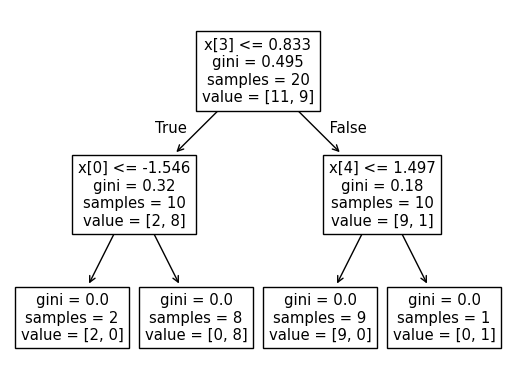

In [122]:
plot_tree(clf2)

[Text(0.4, 0.8333333333333334, 'x[4] <= -0.888\ngini = 0.455\nsamples = 20\nvalue = [13, 7]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 2.82\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

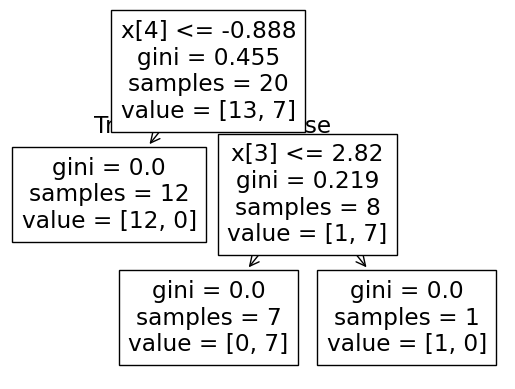

In [123]:
plot_tree(clf3)

In [124]:
clf1.predict(np.array([-1.757534,	-3.938943	,0.378616,	1.513547,	0.002436]).reshape(1,5))

c:\Users\lucius seneca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [125]:
clf2.predict(np.array([-1.757534,	-3.938943	,0.378616,	1.513547,	0.002436]).reshape(1,5))

c:\Users\lucius seneca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [126]:
clf3.predict(np.array([-1.757534,	-3.938943	,0.378616,	1.513547,	0.002436]).reshape(1,5))

c:\Users\lucius seneca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

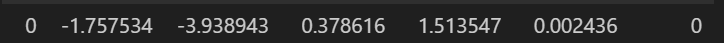

## Column Sampling

In [127]:
df1=sample_feature(df,0.8)
df2=sample_feature(df,0.8)
df3=sample_feature(df,0.8)

C:\Users\lucius seneca\AppData\Local\Temp\ipykernel_21204\2908226663.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["target"]=df["target"]
C:\Users\lucius seneca\AppData\Local\Temp\ipykernel_21204\2908226663.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["target"]=df["target"]
C:\Users\lucius seneca\AppData\Local\Temp\ipykernel_21204\2908226663.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [128]:
df1

,col5,col2,col1,col4,target
0,-3.704155,0.397599,0.557837,2.166946,0
1,-0.720694,-2.550442,1.394523,-0.486745,1
2,2.144816,1.098142,-1.613203,-2.187321,1
3,0.109802,0.436693,1.480022,-0.784443,1
4,1.660550,1.145848,-2.958216,1.620441,0
...,...,...,...,...,...
95,-0.534569,1.989116,-1.909789,0.295037,0
96,-1.046935,1.193202,-0.856545,1.870952,0
97,-0.300641,0.453738,0.214027,-1.669178,1
98,-1.286991,2.776097,-2.029340,1.199433,0


In [129]:
df2

,col1,col5,col4,col3,target
0,0.557837,-3.704155,2.166946,0.965699,0
1,1.394523,-0.720694,-0.486745,-4.422000,1
2,-1.613203,2.144816,-2.187321,0.762169,1
3,1.480022,0.109802,-0.784443,-0.259981,1
4,-2.958216,1.660550,1.620441,0.683124,0
...,...,...,...,...,...
95,-1.909789,-0.534569,0.295037,1.514830,0
96,-0.856545,-1.046935,1.870952,0.692450,0
97,0.214027,-0.300641,-1.669178,-2.482687,1
98,-2.029340,-1.286991,1.199433,1.452219,0


In [130]:
from sklearn.tree import DecisionTreeClassifier
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()

In [131]:
clf1.fit(df1.iloc[:,0:4],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:4],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:4],df3.iloc[:,-1])

DecisionTreeClassifier()

In [132]:
clf1.predict(np.array([-1.153825,-0.494453,1.346745,0.471468]).reshape(1,4))

c:\Users\lucius seneca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [133]:
clf2.predict(np.array([-1.153825,-0.494453,1.346745,0.471468]).reshape(1,4))

c:\Users\lucius seneca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [134]:
clf3.predict(np.array([-1.153825,-0.494453,1.346745,0.471468]).reshape(1,4))

c:\Users\lucius seneca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])